In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Major Violation Plot

In [2]:
ins_geo = pd.read_csv('DataSet/inspections_geocoded.csv')
ins_sum = pd.read_csv('DataSet/potential_inspection_summary_data.csv')
ins_vio = pd.read_csv('DataSet/potential_violation_details_data.csv')
ins_info= pd.read_csv('DataSet/2015to2017_inspection_records.csv')
ins_vio.violation_number = ins_vio.violation_number.astype('str')

In [3]:
valid_id=pd.unique(ins_info[ins_info.known_valid==True].inspection_id)
ins_vio['known_valid']=[True if x in valid_id else False for x in ins_vio.inspection_id]

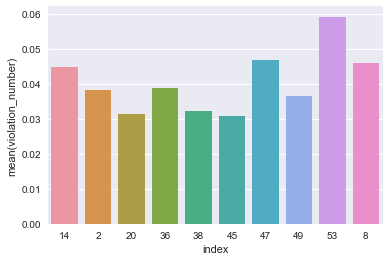

In [4]:
pp1=ins_vio.violation_number.value_counts().reset_index()
sns.barplot(pp1['index'][:10],pp1['violation_number'][:10]/len(ins_vio))

In [5]:
idtoname=ins_sum[['inspection_id','establishment_name']].set_index('inspection_id').T.to_dict()
ins_vio['establishment_name']=[idtoname[x]['establishment_name'] for x in ins_vio['inspection_id']]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

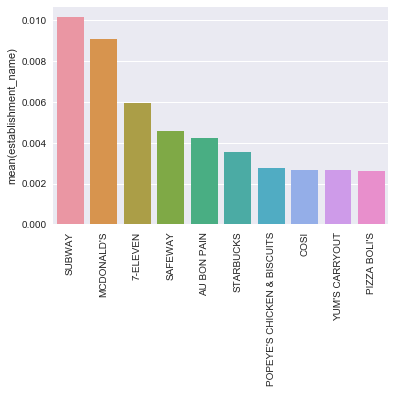

In [6]:
sns.barplot(ins_vio.establishment_name.value_counts().index[:10],
           ins_vio.establishment_name.value_counts()[:10]/len(ins_vio))
plt.xticks(rotation='vertical')

## Violation Big Picture

In [7]:
ins_info=ins_info.drop(['Unnamed: 0',
                        "critical_violations","critical_violations_corrected_on_site","critical_violations_repeated",
                        "noncritical_violations","noncritical_violations_corrected_on_site","noncritical_violations_repeated"],
                       axis=1)

In [8]:
ins_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31168 entries, 0 to 31167
Data columns (total 32 columns):
inspection_id                                       31168 non-null int64
latitude                                            31168 non-null float64
longitude                                           31168 non-null float64
establishment_name                                  31168 non-null object
address                                             31168 non-null object
telephone                                           29298 non-null object
email                                               26532 non-null object
inspection_date                                     31168 non-null object
inspection_time_in                                  31157 non-null object
inspection_time_out                                 24889 non-null object
license_holder                                      30808 non-null object
license_number                                      27794 non-null object
li

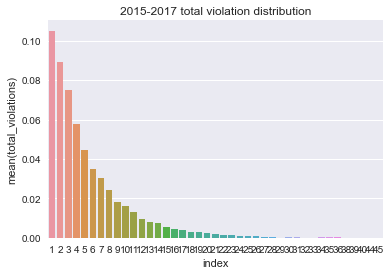

In [9]:
sns.barplot(x=ins_info.total_violations.value_counts().reset_index()['index'][1:],
            y=ins_info.total_violations.value_counts()[1:]/len(ins_info))
plt.title('2015-2017 total violation distribution')

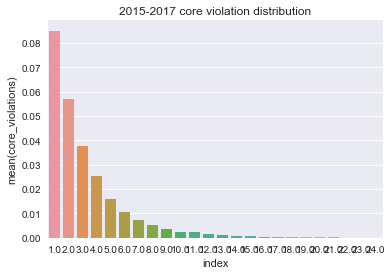

In [10]:
sns.barplot(x=ins_info.core_violations.value_counts().reset_index()['index'][1:],
            y=ins_info.core_violations.value_counts()[1:]/len(ins_info))
plt.title('2015-2017 core violation distribution')

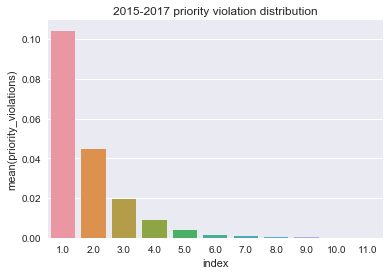

In [11]:
sns.barplot(x=ins_info.priority_violations.value_counts().reset_index()['index'][1:],
            y=ins_info.priority_violations.value_counts()[1:]/len(ins_info))
plt.title('2015-2017 priority violation distribution')

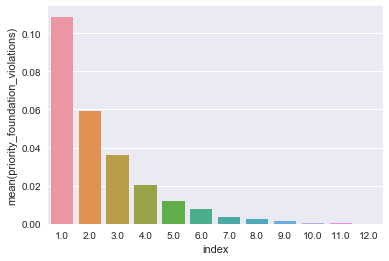

In [12]:
sns.barplot(x=ins_info.priority_foundation_violations.value_counts().reset_index()['index'][1:],
           y=ins_info.priority_foundation_violations.value_counts()[1:]/len(ins_info))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

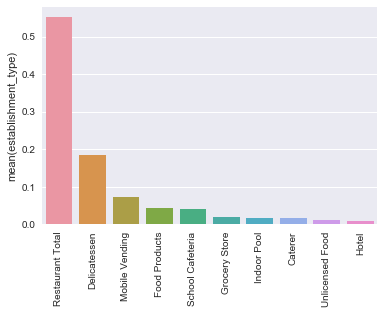

In [20]:
sns.barplot(x=ins_info.establishment_type.value_counts().index[:10],
           y=ins_info.establishment_type.value_counts()[:10]/len(ins_info))
plt.xticks(rotation='vertical')

In [18]:
ins_info.risk_category.value_counts().reset_index()

,index,risk_category
0,3.0,16128
1,2.0,9329
2,1.0,3701
3,4.0,1425
4,5.0,546


In [14]:
ins_info.pivot_table(index='risk_category',values='violate',aggfunc=np.mean)

,violate
risk_category,
1.0,0.450689
2.0,0.683782
3.0,0.503596
4.0,0.752281
5.0,0.684982
